In [1]:
import nltk

In [2]:
nltk.tag.hmm.demo_pos()


HMM POS tagging demo

Training HMM...
Testing...
Test: the/AT fulton/NP county/NN grand/JJ jury/NN said/VBD friday/NR an/AT investigation/NN of/IN atlanta's/NP$ recent/JJ primary/NN election/NN produced/VBD ``/`` no/AT evidence/NN ''/'' that/CS any/DTI irregularities/NNS took/VBD place/NN ./.

Untagged: the fulton county grand jury said friday an investigation of atlanta's recent primary election produced `` no evidence '' that any irregularities took place .

HMM-tagged: the/AT fulton/NP county/NN grand/JJ jury/NN said/VBD friday/NR an/AT investigation/NN of/IN atlanta's/NP$ recent/JJ primary/NN election/NN produced/VBD ``/`` no/AT evidence/NN ''/'' that/CS any/DTI irregularities/NNS took/VBD place/NN ./.

Entropy: 18.73317397044532

------------------------------------------------------------
Test: the/AT jury/NN further/RBR said/VBD in/IN term-end/NN presentments/NNS that/CS the/AT city/NN executive/JJ committee/NN ,/, which/WDT had/HVD over-all/JJ charge/NN of/IN the/AT election/N

In [3]:
# pos-tag
from nltk import pos_tag, word_tokenize
pos_tag(word_tokenize('John and Smith are going to NY and Germany'))
# 命名實體是 John, Smith, NY, Germany 因為它們被標注了 NNP 註記

[('John', 'NNP'),
 ('and', 'CC'),
 ('Smith', 'NNP'),
 ('are', 'VBP'),
 ('going', 'VBG'),
 ('to', 'TO'),
 ('NY', 'NNP'),
 ('and', 'CC'),
 ('Germany', 'NNP')]

In [5]:
# pos-tag + NER
from nltk.corpus import brown
from nltk.tag import UnigramTagger
tagger = UnigramTagger(brown.tagged_sents(categories='news')[:1000])
sentence = ['John', 'and', 'Smith', 'went', 'to', 'NY', 'and', 'Germany']
for word, tag in tagger.tag(sentence):
    print(word, '->', tag)

# Unigram 是可以訓練 NER 的 nltk package

John -> NP
and -> CC
Smith -> NP
went -> VBD
to -> TO
NY -> None
and -> CC
Germany -> NP-TL


In [ ]:
## NLTK 實作 sentiment analysis github
## 柯文哲也可以 （中文corpus）
## 但是一段話在沒有label的情況下要怎麼判斷情緒？ -> unsupervised learning

## 有 label 的 data - sentiment analysis
- reference: https://www.kaggle.com/ngyptr/python-nltk-sentiment-analysis

In [29]:
from wordcloud import WordCloud, STOPWORDS
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

In [15]:
import pandas as pd 
data = pd.read_csv('/Users/youngmihuang/Downloads/Sentiment.csv')
data = data[['sentiment','text']]

In [21]:
data = data[data.sentiment!= 'Neutral']

In [25]:
train, test = train_test_split(data,test_size = 0.1)

In [33]:
train_pos = train[train.sentiment == 'Positive']
train_pos = train_pos[['text']]
train_neg = train[train.sentiment == 'Negative']
train_neg = train_neg[['text']]

test_pos = test[ test['sentiment'] == 'Positive']
test_pos = test_pos['text']
test_neg = test[ test['sentiment'] == 'Negative']
test_neg = test_neg['text']

Positive words


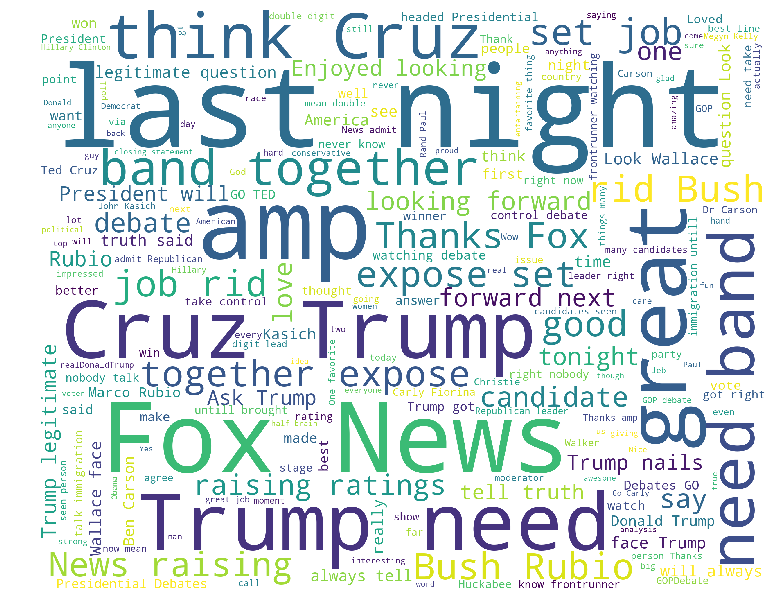

Negative words


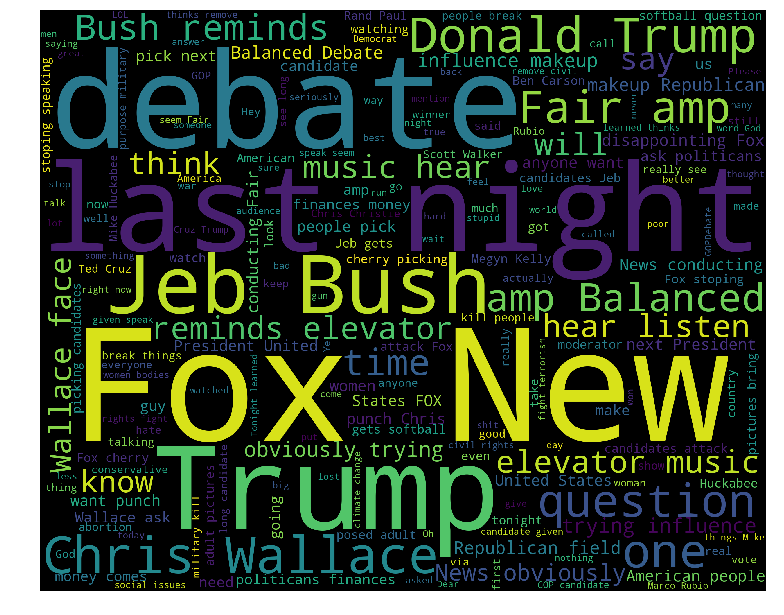

In [57]:
def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = ' '.join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
print("Positive words")
wordcloud_draw(train_pos.text,'white')
print("Negative words")
wordcloud_draw(train_neg.text)

In [58]:
# 移除 stopwords
tweets = []
stopwords_set = set(stopwords.words("english"))

for index, row in train.iterrows():
    words_filtered = [e.lower() for e in row.text.split() if len(e) >= 3]
    words_cleaned = [word for word in words_filtered
        if 'http' not in word
        and not word.startswith('@')
        and not word.startswith('#')
        and word != 'RT']
    words_without_stopwords = [word for word in words_cleaned if not word in stopwords_set]
    tweets.append((words_without_stopwords, row.sentiment))



In [59]:
def get_words_in_tweets(tweets):
    allt = []
    for (words, sentiment) in tweets:
        allt.extend(words)
    return allt

def get_word_features(wordlist):
    wordlist = nltk.FreqDist(wordlist)
    features = wordlist.keys()
    return features
w_features = get_word_features(get_words_in_tweets(tweets))

def extract_features(document):
    document_words = set(document)
    features = {}
    for word in w_features:
        features['contains(%s)' % word] = (word in document_words)
    return features

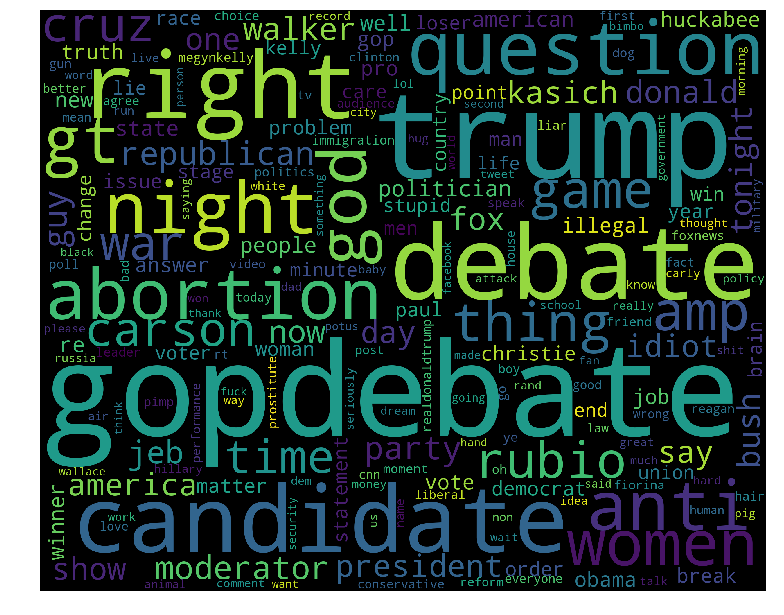

In [61]:
wordcloud_draw(w_features)

In [62]:
training_set = nltk.classify.apply_features(extract_features,tweets)
classifier = nltk.NaiveBayesClassifier.train(training_set)

In [63]:
neg_cnt = 0
pos_cnt = 0
for obj in test_neg: 
    res =  classifier.classify(extract_features(obj.split()))
    if(res == 'Negative'): 
        neg_cnt = neg_cnt + 1
for obj in test_pos: 
    res =  classifier.classify(extract_features(obj.split()))
    if(res == 'Positive'): 
        pos_cnt = pos_cnt + 1
        
print('[Negative]: %s/%s '  % (len(test_neg),neg_cnt))        
print('[Positive]: %s/%s '  % (len(test_pos),pos_cnt))    

[Negative]: 836/805 
[Positive]: 237/84 
